1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
### --- Libraries --- ###
import numpy as np
from scipy import linalg as la
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
def generate_data(n_points):

    '''
        Function to generate 3d datasets:
        - it takes as input parameter the number of points

    '''
    x = np.random.normal(0, 1, n_points)
    y = np.random.normal(0, 3, n_points) + x
    z = 2 * x + y
    return x, y, z

# a) generate dataset
n = 1000
x1, x2, x3 = generate_data(n)

x = np.array([x1,x2,x3])
 
A = np.cov(x)
print('Covariance matrix of dataset:\n', A)

# b) Find eigenvalues and eigenvectors 

eigenVal, eigenVect = la.eig(A)
idx = np.argsort(eigenVal)[::-1]
eigenVal = eigenVal[idx]
eigenVect = eigenVect[:, idx]

print('\n ------ Eigendecomposition of the covariance matrix ------\n')
print('Eigenvalues:\n', eigenVal)
print('\nReal part of eigenvalues:\n', np.real_if_close(eigenVal))
# V is the matrix of the eigenvectors
print('\nEigenvectors:\n', eigenVect, '\n')


# c) Find the eigenvectors and eigenvalues using the SVD

# perform the SVD
U, S, Vt = la.svd(x)
print('\n ------ Eigendecomposition using SVD ------ \n')
#print('Spectrum:\n', S, '\n')

eigenVect_svd = U
eigenVal_svd = S**2 / (n-1)

print('Eigenvalues:\n', eigenVal_svd, '\n')
print('\n Eigenvectors:\n', eigenVect_svd, '\n')


#check_res = np.allclose(egl, egl_svd, 1.e-20)

precision = 1.e-02
check_res = np.allclose(eigenVal, eigenVal_svd, precision)
if check_res:
    print('The procedures yield the same eigenvalues with a precision of',precision)

check_res_egv = np.allclose(eigenVal, eigenVal_svd, precision)
if check_res_egv:
    print('The procedures yield the same eigenvectors with a precision of',precision)


'''
    The third eigenvalue is slightly different. If we use
    the np.allclose() method with a high precision,
    the eigenvalues are indeed different.
'''

check_hp = np.allclose(eigenVal, eigenVal_svd, 1.0e-15)

print('\nCheck if the eigenvalues are the same with a precision of o(1.e-15):',check_hp)

Covariance matrix of dataset:
 [[ 0.97686873  1.01372856  2.96746602]
 [ 1.01372856 11.11830967 13.14576678]
 [ 2.96746602 13.14576678 19.08069882]]

 ------ Eigendecomposition of the covariance matrix ------

Eigenvalues:
 [2.91519693e+01+0.j 2.02390790e+00+0.j 1.09807604e-15+0.j]

Real part of eigenvalues:
 [2.91519693e+01 2.02390790e+00 1.09807604e-15]

Eigenvectors:
 [[-0.10555077  0.56761992 -0.81649658]
 [-0.58963881 -0.69689268 -0.40824829]
 [-0.80074035  0.43834716  0.40824829]] 


 ------ Eigendecomposition using SVD ------ 

Eigenvalues:
 [2.91845031e+01 2.02520761e+00 1.88420200e-31] 


 Eigenvectors:
 [[-0.10541478  0.56764519 -0.81649658]
 [-0.58980575 -0.6967514  -0.40824829]
 [-0.80063531  0.43853897  0.40824829]] 

The procedures yield the same eigenvalues with a precision of 0.01
The procedures yield the same eigenvectors with a precision of 0.01

Check if the eigenvalues are the same with a precision of o(1.e-15): False


In [14]:
# 4) 

# calculate lambda matrix
Lambda = np.diag(np.real_if_close(eigenVal))
print('Lambda:\n', Lambda, '\n')

print('p=3 => k=1,2')
print ('PCA with k=1 (0):',abs(Lambda[0,0])/Lambda.trace()*100,'% of the total variability is retained')
print ('PCA with k=1 (1):',abs(Lambda[1,1])/Lambda.trace()*100,'% of the total variability is retained')
print ('PCA with k=1 (2):',abs(Lambda[2,2])/Lambda.trace()*100,'% of the total variability is retained')

print ('PCA with k=2 (0,1):',abs(Lambda[0,0] + Lambda[1,1])/Lambda.trace()*100,'% of the total variability is retained')
print ('PCA with k=2 (0,2):',abs(Lambda[0,0] + Lambda[2,2])/Lambda.trace()*100,'% of the total variability is retained')
print ('PCA with k=2 (1,2):',abs(Lambda[1,1] + Lambda[2,2])/Lambda.trace()*100,'% of the total variability is retained')


Lambda:
 [[2.91519693e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02390790e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.09807604e-15]] 

p=3 => k=1,2
PCA with k=1 (0): 93.50809639371904 % of the total variability is retained
PCA with k=1 (1): 6.491903606280956 % of the total variability is retained
PCA with k=1 (2): 3.5221977280106308e-15 % of the total variability is retained
PCA with k=2 (0,1): 100.0 % of the total variability is retained
PCA with k=2 (0,2): 93.50809639371904 % of the total variability is retained
PCA with k=2 (1,2): 6.491903606280959 % of the total variability is retained


NameError: name 'M_reduced' is not defined

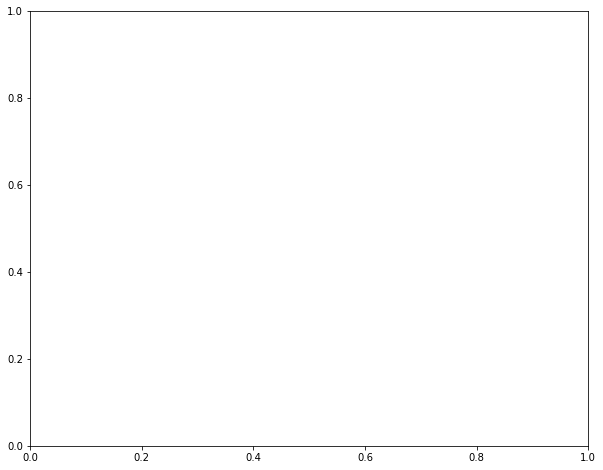

In [15]:
# Redefine the data in the basis yielded by the PCA procedure
x2 = np.dot(eigenVect.T, x)

# plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(M_reduced[0], M_reduced[1], marker='o', s = 27, color='#2A5BFF', edgecolor='#1C3CAA', alpha=0.6)

# plot settings
ax.set_title('Reduced dataset', size=18, pad = 20)
ax.set_ylabel('y1',fontsize = 20, loc = 'center')
ax.set_xlabel('y2', fontsize = 20, loc = 'center')
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()

fig.tight_layout()
plt.show()


Text(0, 0.5, 'y3')

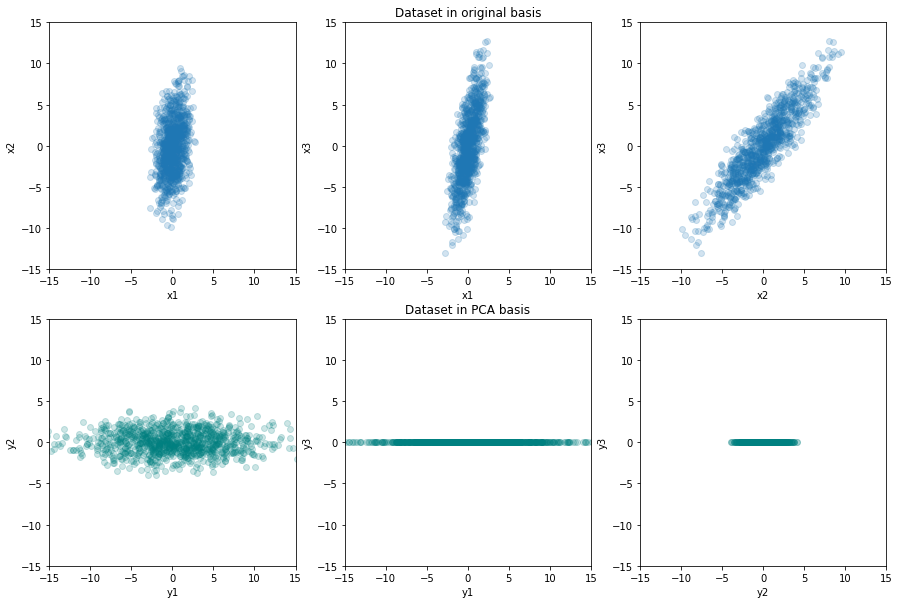

In [16]:
# Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows
# of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax1.scatter(x[0, :], x[1, :], alpha=0.2)
ax1.set_xlim([-15,15])
ax1.set_ylim([-15,15])
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax2.set_title('Dataset in original basis')
ax2.scatter(x[0, :], x[2, :], alpha=0.2)
ax2.set_xlim([-15,15])
ax2.set_ylim([-15,15])
ax2.set_xlabel('x1')
ax2.set_ylabel('x3')

ax3.scatter(x[1, :], x[2, :], alpha=0.2)
ax3.set_xlim([-15,15])
ax3.set_ylim([-15,15])
ax3.set_xlabel('x2')
ax3.set_ylabel('x3')

ax4.scatter(x2[0, :], x2[1, :], alpha=0.2, c = 'teal')
ax4.set_xlim([-15,15])
ax4.set_ylim([-15,15])
ax4.set_xlabel('y1')
ax4.set_ylabel('y2')

ax5.set_title('Dataset in PCA basis')
ax5.scatter(x2[0, :], x2[2, :], alpha=0.2, c = 'teal')
ax5.set_xlim([-15,15])
ax5.set_ylim([-15,15])
ax5.set_xlabel('y1')
ax5.set_ylabel('y3')

ax6.scatter(x2[1, :], x2[2, :], alpha=0.2, c = 'teal')
ax6.set_xlim([-15,15])
ax6.set_ylim([-15,15])
ax6.set_xlabel('y2')
ax6.set_ylabel('y3')

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 